In [1]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import AveragePooling2D, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

NUM_CLASSES = 10

(train_X, train_y), (test_X, test_y) = cifar10.load_data()
print('x_train shape:', train_X.shape)
print(train_X.shape[0], 'train samples')

input_shape = train_X.shape[1:]

train_X = train_X.astype('float32') / 255
test_X = test_X.astype('float32') / 255

inputs = Input(shape=input_shape)

conv = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')
x = conv(inputs)
x = BatchNormalization()(x)

conv = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',
              kernel_regularizer=l2(1e-4))
y = conv(x)
y = BatchNormalization()(y)

conv = Conv2D(filters=32, kernel_size=3, padding='same',
              kernel_regularizer=l2(1e-4))
y = conv(y)
y = BatchNormalization()(y)

x = keras.layers.add([x, y])
x = Activation('relu')(x)

conv = Conv2D(filters=32, kernel_size=3, padding='same',
              activation='relu',
              kernel_regularizer=l2(1e-4))
y = conv(x)
y = BatchNormalization()(y)

conv = Conv2D(filters=32, kernel_size=3, padding='same',
              kernel_regularizer=l2(1e-4))
y = conv(y)
y = BatchNormalization()(y)

x = keras.layers.add([x, y])
x = Activation('relu')(x)

x = AveragePooling2D(pool_size=8)(x)
y = Flatten()(x)

y = Dense(512, activation='relu')(y)
outputs = Dense(NUM_CLASSES, activation='softmax')(y)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

x_train shape: (50000, 32, 32, 3)
50000 train samples
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 32)   896         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 3

In [2]:
import os

from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam

EPOCHS = 100
BATCH_SIZE = 200

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_model-{epoch:03d}-{val_accuracy:.4f}.h5'

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

filepath = os.path.join(save_dir, model_name)

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 90:
        lr *= 0.5e-3
    elif epoch > 80:
        lr *= 1e-3
    elif epoch > 60:
        lr *= 1e-2
    elif epoch > 40:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

my_callbacks = [checkpoint, lr_scheduler]

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(train_X, train_y, validation_data=(test_X, test_y),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    callbacks=my_callbacks)

Epoch 1/100
250/250 [==============================] - ETA: 0s - loss: 1.4156 - accuracy: 0.4952
Epoch 00001: val_accuracy improved from -inf to 0.20830, saving model to C:\Users\JK\딥러닝 소스코드\saved_models\cifar10_model-001-0.2083.h5
250/250 [==============================] - 8s 23ms/step - loss: 1.4156 - accuracy: 0.4952 - val_loss: 2.9573 - val_accuracy: 0.2083
Epoch 2/100
  4/250 [..............................] - ETA: 5s - loss: 1.0880 - accuracy: 0.6175

C:\Users\JK\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


250/250 [==============================] - ETA: 0s - loss: 0.9982 - accuracy: 0.6481
Epoch 00002: val_accuracy improved from 0.20830 to 0.50420, saving model to C:\Users\JK\딥러닝 소스코드\saved_models\cifar10_model-002-0.5042.h5
250/250 [==============================] - 6s 22ms/step - loss: 0.9982 - accuracy: 0.6481 - val_loss: 1.4692 - val_accuracy: 0.5042
Epoch 3/100
250/250 [==============================] - ETA: 0s - loss: 0.8420 - accuracy: 0.7085
Epoch 00003: val_accuracy improved from 0.50420 to 0.70980, saving model to C:\Users\JK\딥러닝 소스코드\saved_models\cifar10_model-003-0.7098.h5
250/250 [==============================] - 6s 22ms/step - loss: 0.8420 - accuracy: 0.7085 - val_loss: 0.8480 - val_accuracy: 0.7098
Epoch 4/100
250/250 [==============================] - ETA: 0s - loss: 0.7443 - accuracy: 0.7427
Epoch 00004: val_accuracy did not improve from 0.70980
250/250 [==============================] - 6s 22ms/step - loss: 0.7443 - accuracy: 0.7427 - val_loss: 0.9332 - val_accuracy: 0

250/250 [==============================] - ETA: 0s - loss: 0.0972 - accuracy: 0.9756
Epoch 00028: val_accuracy did not improve from 0.78880
250/250 [==============================] - 6s 22ms/step - loss: 0.0972 - accuracy: 0.9756 - val_loss: 1.1075 - val_accuracy: 0.7682
Epoch 29/100
250/250 [==============================] - ETA: 0s - loss: 0.0904 - accuracy: 0.9782
Epoch 00029: val_accuracy did not improve from 0.78880
250/250 [==============================] - 6s 22ms/step - loss: 0.0904 - accuracy: 0.9782 - val_loss: 1.0124 - val_accuracy: 0.7855
Epoch 30/100
250/250 [==============================] - ETA: 0s - loss: 0.0781 - accuracy: 0.9834
Epoch 00030: val_accuracy improved from 0.78880 to 0.79070, saving model to C:\Users\JK\딥러닝 소스코드\saved_models\cifar10_model-030-0.7907.h5
250/250 [==============================] - 6s 22ms/step - loss: 0.0781 - accuracy: 0.9834 - val_loss: 1.0135 - val_accuracy: 0.7907
Epoch 31/100
250/250 [==============================] - ETA: 0s - loss: 0.0

Epoch 57/100
250/250 [==============================] - ETA: 0s - loss: 0.0580 - accuracy: 0.9885
Epoch 00057: val_accuracy did not improve from 0.79070
250/250 [==============================] - 5s 22ms/step - loss: 0.0580 - accuracy: 0.9885 - val_loss: 1.6402 - val_accuracy: 0.7709
Epoch 58/100
250/250 [==============================] - ETA: 0s - loss: 0.0669 - accuracy: 0.9853
Epoch 00058: val_accuracy did not improve from 0.79070
250/250 [==============================] - 5s 21ms/step - loss: 0.0669 - accuracy: 0.9853 - val_loss: 1.4673 - val_accuracy: 0.7684
Epoch 59/100
250/250 [==============================] - ETA: 0s - loss: 0.0694 - accuracy: 0.9846
Epoch 00059: val_accuracy did not improve from 0.79070
250/250 [==============================] - 5s 21ms/step - loss: 0.0694 - accuracy: 0.9846 - val_loss: 1.6563 - val_accuracy: 0.7626
Epoch 60/100
250/250 [==============================] - ETA: 0s - loss: 0.0506 - accuracy: 0.9916
Epoch 00060: val_accuracy did not improve from 

Epoch 85/100
250/250 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 1.0000
Epoch 00085: val_accuracy improved from 0.80700 to 0.80750, saving model to C:\Users\JK\딥러닝 소스코드\saved_models\cifar10_model-085-0.8075.h5
250/250 [==============================] - 6s 22ms/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 1.4494 - val_accuracy: 0.8075
Epoch 86/100
250/250 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 1.0000
Epoch 00086: val_accuracy improved from 0.80750 to 0.80780, saving model to C:\Users\JK\딥러닝 소스코드\saved_models\cifar10_model-086-0.8078.h5
250/250 [==============================] - 6s 22ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 1.4534 - val_accuracy: 0.8078
Epoch 87/100
250/250 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 1.0000
Epoch 00087: val_accuracy did not improve from 0.80780
250/250 [==============================] - 6s 22ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 1.4523 - 

In [3]:
# Score trained model.
scores = model.evaluate(test_X, test_y, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 1.3718 - accuracy: 0.8060
Test loss: 1.371800422668457
Test accuracy: 0.8059999942779541


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


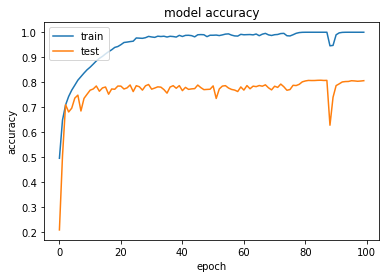

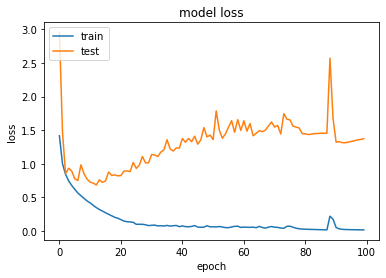

In [4]:
import matplotlib.pyplot as plt

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()